# EMG Anylsis

You'll learn how to load and analyze EMG signals. 

This demo is a jupyter notebook, i.e. intended to be run step by step.

Author: Eric Einspänner
<br>
Contributor: Nastaran Takmilhomayouni

First version: 6th of July 2023 # to be changed


Copyright 2023 Clinic of Neuroradiology, Magdeburg, Germany

License: Apache-2.0

*This notebook is inspired by: https://github.com/hongnhung910/EMG-Signal-Processing/blob/master/EMG_parameters.ipynb*

*Dataset: https://github.com/hongnhung910/EMG-Signal-Processing/tree/master/Data
<br>
    https://github.com/MIT-LCP/wfdb-python/tree/main/sample-data*

## Table Of Contents
0. [Initial Set-Up for Google Colab](#initial-set-up-for-google-colab)
1. [Initial Set-Up (offline)](#initial-set-up-offline)
2. [File Formats](#File-Formats)

## Initial Set-Up for Google Colab
<u> Execute these code blocks just in Google Colab! </u>

In [ ]:
!git clone https://github.com/University-Clinic-of-Neuroradiology/python-bootcamp.git

In [ ]:
import os
import sys
from google.colab import output
output.enable_custom_widget_manager()

sys.path.insert(0,'/content/python-bootcamp/notebooks/TimeAnalysis')
os.chdir(sys.path[0])

In [ ]:
%pip install -q ipympl numpy matplotlib SciPy wfdb biosignalsnotebooks

In [ ]:
import os
import numpy as np
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax, mean
import matplotlib.pyplot as plt

from scipy.integrate import cumtrapz
from scipy.signal import welch
import wfdb

import biosignalsnotebooks as bsnb                  # biosignalsnotebooks python packag

## Initial Set-Up (offline)

In [2]:
# Make sure figures appears inline and animations works
# Edit this to ""%matplotlib notebook" when using the "classic" jupyter notebook interface
%matplotlib widget

In [3]:
import os
import numpy as np
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax, mean
import matplotlib.pyplot as plt

from scipy.integrate import cumtrapz
from scipy.signal import welch
import wfdb

import biosignalsnotebooks as bsnb                  # biosignalsnotebooks python package

## --- Start notebook ---

# EMG file formats
| Format Name | File Extension | Origin                                         |
|-------------|----------------|------------------------------------------------|
| Text        | .txt           |                                                |
| Header      | .mat/.hea      | Analyze Software, Mayo Clinic                  |

## .txt
To open EMG file in `.txt` format, you can use `readlines()` function from python built-in file opening functionality.

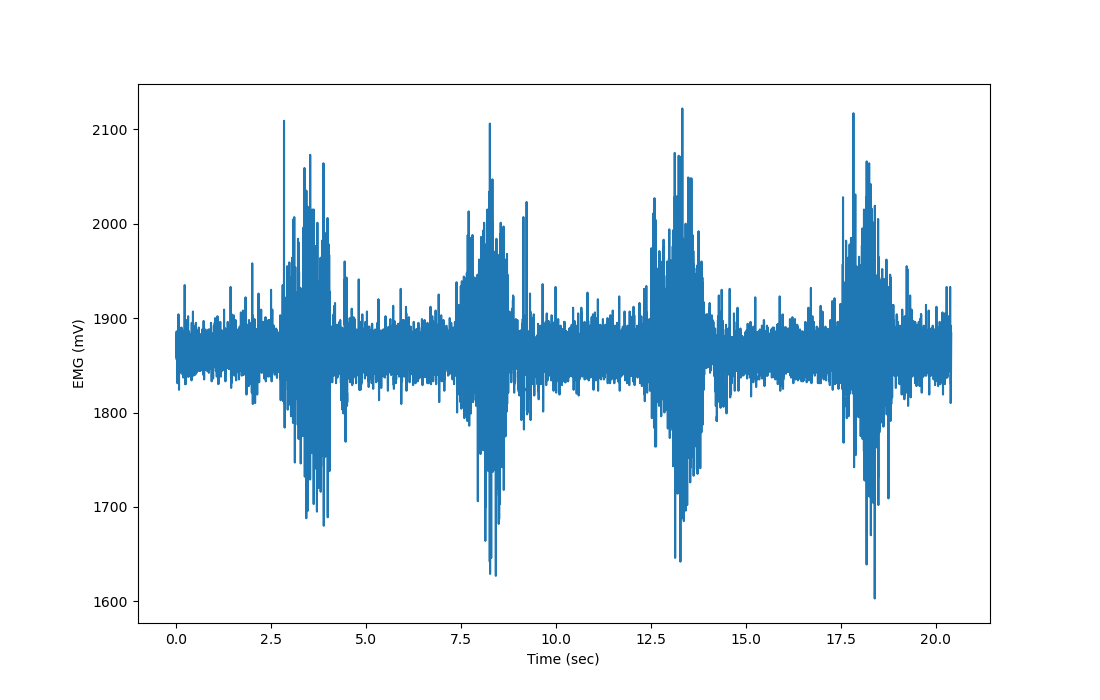

In [5]:
fs = 1000
dir = os.path.join(os.path.realpath(''),'Data/EMG/emg3.txt')
emg_raw = []

with open(dir) as f:
    lines = f.readlines()
for l in lines:
    emg_raw.append(float(l.replace("\n","")))

time = linspace(0, len(emg_raw) / fs, len(emg_raw))

# plot EMG signal
fig = plt.figure()
plt.plot(time, emg_raw)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (mV)')
fig_name = 'rawEMG.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

In [25]:
emg_detrend = (emg_raw - mean(emg_raw)) #remove average of the signal to better get the activation onset

#plot onset and end of muscle contraction (burst in EMG signal)
burst_begin, burst_end = bsnb.detect_emg_activations(emg_detrend, fs, smooth_level=20, threshold_level=10, 
                                                     time_units=True, plot_result=True)[:2]

In [16]:
print('EMG Onset Points: ',burst_begin) # EMG signal time points of burst begin
print('EMG Offset Points: ', burst_end) # EMG signal time points of burst end
print('Number of Muscular Activations: ', len(burst_begin))  # Number of bursts

# Bursts Duration
bursts_time = burst_end - burst_begin  

# Parameter extraction
max_time = max(bursts_time)
min_time = min(bursts_time)
avg_time = average(bursts_time)
std_time = std(bursts_time)

# Dictionary containing burst information
duration_extract = {'Maximum Activation Time':max_time, 
                     'Minimum Activation Time':min_time, 
                     'Average Activation Time':avg_time, 
                     'Standard deviation Time':std_time}
for x in duration_extract:
    print(x, ': ',"{:.3f}".format(duration_extract[x]),'s')

EMG Onset Points:  [ 2.88314126  7.56537067 12.4726111  17.60786271]
EMG Offset Points:  [ 4.26520898  8.91443677 14.02968739 18.960929  ]
Number of Muscular Activations:  4
Maximum Activation Time :  1.557 s
Minimum Activation Time :  1.349 s
Average Activation Time :  1.410 s
Standard deviation Time :  0.086 s


In [18]:
# Maximum Value of EMG (after removing the average value)
max_sample_value = max(emg_detrend)

# Minimum Value of EMG (after removing the average value)
min_sample_value = min(emg_detrend)

# Average and Standard Deviation
avg_sample_value = average(emg_detrend)
std_sample_value = std(emg_detrend)

# Dictionary containing EMG signal information (after removing the average value)
emg_extract = {"Maximum EMG": max_sample_value, 
               "Minimum EMG": min_sample_value, 
               "Average EMG": avg_sample_value, 
               "Standard Deviation EMG": std_sample_value}
for x in emg_extract:
    print(x, ': ',emg_extract[x],'mV')

Maximum EMG :  258.0205781479667 mV
Minimum EMG :  -260.9794218520333 mV
Average EMG :  3.3643728556519394e-14 mV
Standard Deviation EMG :  30.60473728047268 mV


In [19]:
# Root Mean Square Value of EMG (after removing the average value)
rms = sqrt(sum(emg_detrend * emg_detrend) / len(emg_detrend))

# Signal Power Spectrum Value of EMG (after removing the average value)
f, P = welch(emg_detrend, fs=fs, window='hanning', noverlap=0, nfft=int(256.))

# Total Power and Median Frequency (Frequency that divides the spectrum into two regions with equal power)
area_freq = cumtrapz(P, f, initial=0)
total_power = area_freq[-1]
median_freq = f[where(area_freq >= total_power / 2)[0][0]]
f_max = f[argmax(P)]

print ('Root Mean Square: ', rms,'mV')  
print ('Total Power: ', total_power)
print ('Median Frequency: ', median_freq,'Hz')
print ('Maximum Power Frequency: ', f_max, 'Hz')
bsnb.plot_emg_spect_freq(f, P, f_max, median_freq)

Root Mean Square:  30.60473728047268 mV
Total Power:  868.9731611821707
Median Frequency:  109.375 Hz
Maximum Power Frequency:  101.5625 Hz


## .hea
To open EMG file in `.hea` format, you can use `rdrecord()` function from python `wfdb` package.
<br>
In order to do that you need to put the header file(.hea) and the daza file (.mat) in the same folder

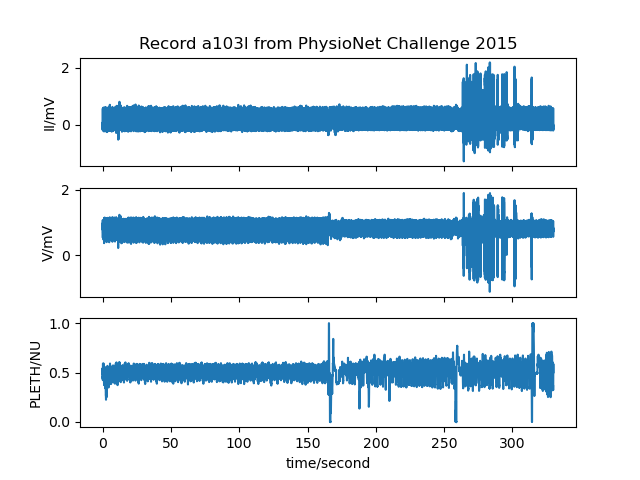

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -1739

In [30]:
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.

# Plot the signals, and show the data.
record = wfdb.rdrecord('Data/EMG/a103l') 
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)


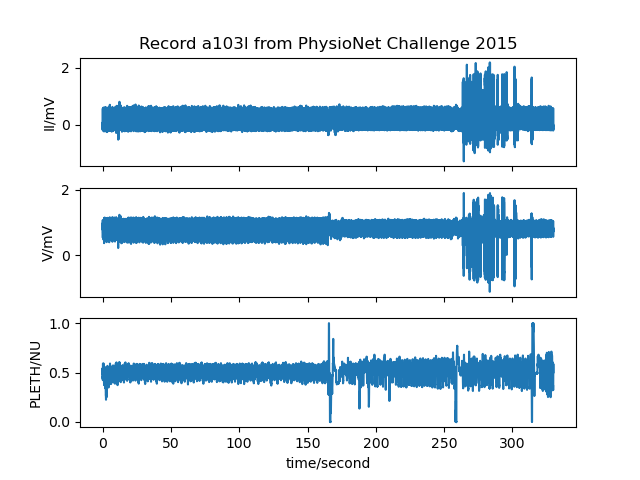

{'record_name': 'a103l',
 'n_sig': 3,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 82500,
 'base_time': None,
 'base_date': None,
 'comments': ['Asystole', 'False alarm'],
 'sig_name': ['II', 'V', 'PLETH'],
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'samps_per_frame': [1, 1, 1],
 'skew': [None, None, None],
 'byte_offset': [24, 24, 24],
 'adc_gain': [7247.0, 10520.0, 12530.0],
 'baseline': [0, 0, 0],
 'units': ['mV', 'mV', 'NU'],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'init_value': [-171, 9127, 6042],
 'checksum': [-27403, -301, -1739

In [32]:
# Can also read the same files hosted on PhysioNet https://physionet.org/content/challenge-2015/1.0.0
# in the /training/ database subdirectory.
record2 = wfdb.rdrecord('a103l', pn_dir='challenge-2015/training/')
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015') 
display(record.__dict__)